In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print("Imported")

Imported


In [14]:
df = pd.read_csv(r"C:\Users\Akash\Desktop\projects\complete_dataset.csv",encoding='latin1')

In [15]:
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890


In [16]:
df.shape

(64, 8)

In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [19]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [ ]:
bangalore_population.to_csv('data/population_dataset.csv')

In [21]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [22]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [ ]:
bangalore_income.to_csv('data/income_dataset.csv')

In [23]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [24]:
CLIENT_ID = 'HQ50UHKTES2JS3ENC4CUCELXIYEFJE44ZJGFAQQZZICZBPJC'
CLIENT_SECRET = 'IA3RHRO4BVEVRW45ROIGGWPSCLOORM3JWRJVQ2A0K4HWBTT5'
VERSION = '20180606'
LIMIT = 150

In [25]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [26]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [27]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [28]:
borough_colors

{'Central': '#75A7C6',
 'Eastern': '#B0CDD3',
 'NorthEastern': '#0F844A',
 'Northern': '#06E405',
 'SouthEastern': '#A097AC',
 'Southern': '#626837',
 'SouthernSuburbs': '#15D003',
 'Western': '#555702'}

In [29]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [30]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [31]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [32]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [34]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [35]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  592


In [36]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [37]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       115
Fast Food Restaurant     30
Café                     29
Bakery                   23
Ice Cream Shop           22
Pizza Place              18
Coffee Shop              17
Department Store         17
Chinese Restaurant       15
Hotel                    11
Name: Neighborhood, dtype: int64

In [38]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  130


## Getting number of venues per neighborhood

In [39]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [40]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     11
                Indiranagar                62
                Jeevanbheemanagar           5
                Malleswaram                 6
                Pete area                   3
                Rajajinagar                 8
                Sadashivanagar             20
                Seshadripuram               8
                Shivajinagar               13
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  23
                CV Raman Nagar              7
                Hoodi                       4
                Krishnarajapuram            1
                Mahadevapura                5
                Marathahalli               10
                Varthur                     1
                Whitefield                  8
NorthEastern    Banaswadi                   6
                HBR Layout                  4
                Horamavu                    2
                Kammanahalli               10
                Lingarajapuram              2
                Ramamurthy Nagar            6
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  13
                R. T. Nagar                 8
...                                       ...
                Yeshwanthpur                7
SouthEastern    BTM Layout                 37
                Bommanahalli                5
                Electronic City             6
                HSR Layout                 11
                Koramangala                 6
                Madiwala                   22
Southern        Banashankari                8
                Basavanagudi               10
                Girinagar                   3
                J. P. Nagar                29
                Jayanagar                  14
                Kumaraswamy Layout         10
                Padmanabhanagar             8
                Uttarahalli                13
SouthernSuburbs Anjanapura                  1
                Arekere                    27
                Begur                       3
                Gottigere                   6
                Hulimavu                    4
                Kothnur                     5
Western         Basaveshwaranagar          21
                Kamakshipalya               1
                Kengeri                     6
                Mahalakshmi Layout         10
                Nagarbhavi                  7
                Nandini Layout              1
                Nayandahalli                3
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[62 rows x 1 columns]

In [41]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [42]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [43]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,62
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,6
5,Central,Pete area,3
6,Central,Rajajinagar,8
7,Central,Sadashivanagar,20
8,Central,Seshadripuram,8
9,Central,Shivajinagar,13


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electron

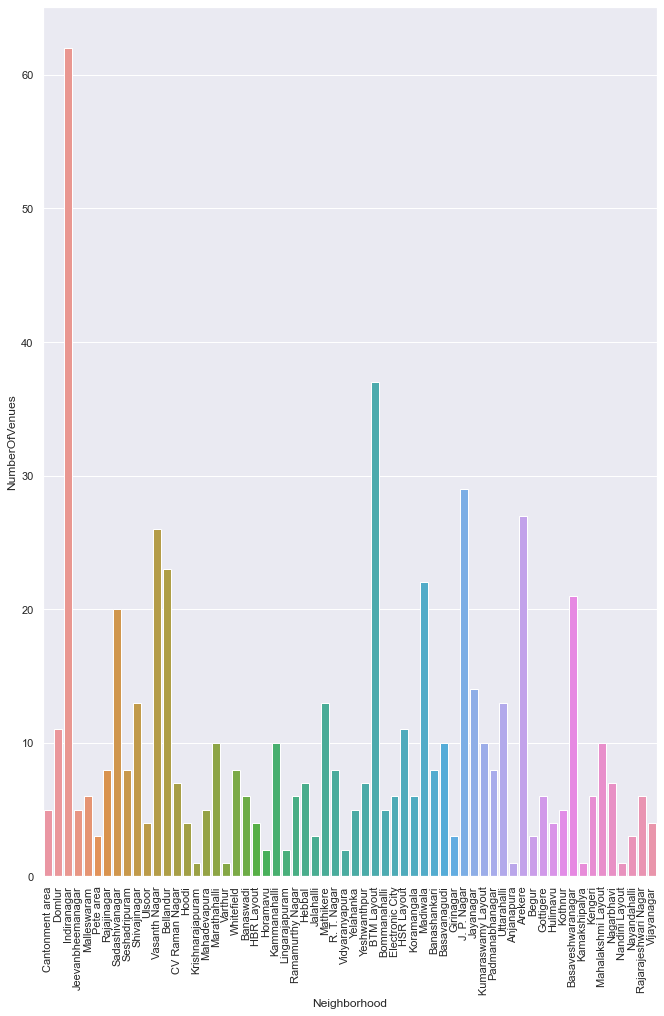

In [44]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that Indiranagar has most number of venues and soo on.

## Exploring Indiranagar venues

In [45]:
bangalore_venues[bangalore_venues['Neighborhood']=='Indiranagar']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
16,Indiranagar,Central,12.971891,77.641151,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
17,Indiranagar,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969913,77.641283,Chocolate Shop
18,Indiranagar,Central,12.971891,77.641151,Vero Moda,12.972808,77.641225,Boutique
19,Indiranagar,Central,12.971891,77.641151,The Black Rabbit,12.969891,77.641251,Pub
20,Indiranagar,Central,12.971891,77.641151,Bodycraft,12.968497,77.641289,Spa
21,Indiranagar,Central,12.971891,77.641151,Mamagoto,12.970113,77.639173,Asian Restaurant
22,Indiranagar,Central,12.971891,77.641151,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant
23,Indiranagar,Central,12.971891,77.641151,Mother Cluckers,12.970176,77.640243,Restaurant
24,Indiranagar,Central,12.971891,77.641151,Bite Me Cupcakes,12.970711,77.641311,Cupcake Shop
25,Indiranagar,Central,12.971891,77.641151,1131 Bar N Kitchen,12.969916,77.641344,Cocktail Bar


## One hot encoding for letting us to compare different venues based on some common scale

In [46]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [47]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Arekere,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.037037,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,BTM Layout,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0.00
3,Banashankari,0.000000,0.125,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Banaswadi,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.00
5,Basavanagudi,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Basaveshwaranagar,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Begur,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Bellandur,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Bommanahalli,0.000000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [49]:
number_of_top_venues = 5

In [50]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1             Venue Category_Playground        0.0
2               Venue Category_Pharmacy        0.0
3  Venue Category_Performing Arts Venue        0.0
4                   Venue Category_Park        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.26
1  Venue Category_Sporting Goods Shop       0.15
2          Venue Category_Pizza Place       0.07
3             Venue Category_Bus Line       0.04
4     Venue Category_Department Store       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.22
1      Venue Category_Ice Cream Shop       0.08
2  Venue Category_Chinese Restaurant       0.08
3         Venue Category_Snack Place       0.08
4         Venue Category_Pizza Place       0.05


--------- Banash

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [51]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [52]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Cupcake Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Bus Line
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Sandwich Place,Venue Category_Italian Restaurant
3,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Accessories Store,Venue Category_Miscellaneous Shop,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Grocery Store,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant


In [53]:
neighborhoods_venues_sorted.shape

(62, 11)

## To find the optimal k value for clustering and we do it using the elbow method

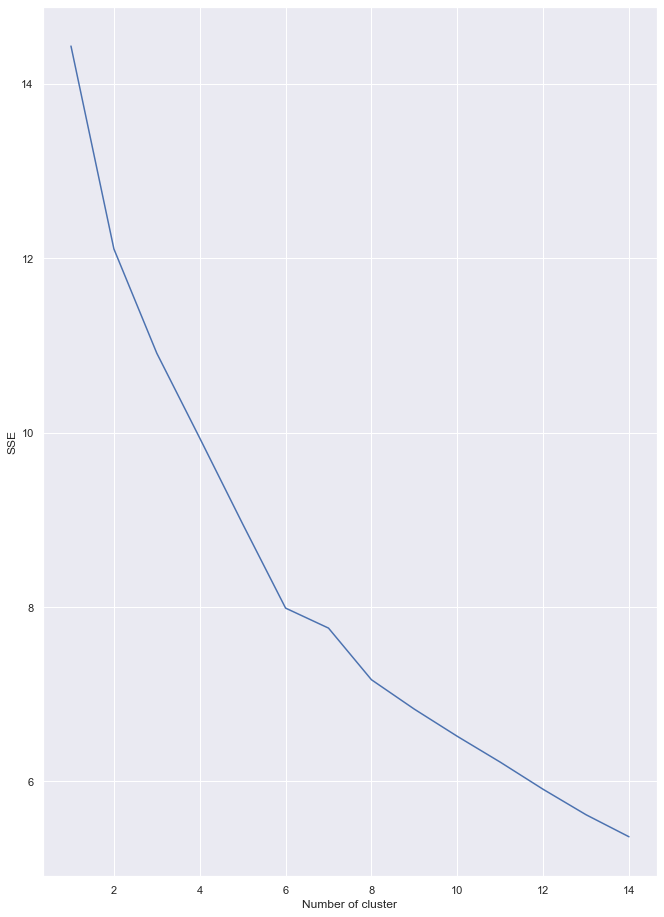

In [54]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### From the above graph, we can see the optimal value for cluster is 6

In [55]:
kmeans = KMeans(n_clusters=6,random_state=0)

In [56]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [57]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [58]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    24
1     9
2    12
3     4
4     4
5     9
Name: Neighborhood, dtype: int64

In [59]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts & Crafts Store',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       ...
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=132)

In [60]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [61]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Cupcake Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Sandwich Place,...,0.0,0.0,0.0,0.0,0.054054,0.0,0.0,0.0,0.0,0
3,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Accessories Store,Venue Category_Miscellaneous Shop,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0


In [62]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [63]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [64]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [65]:
map_clusters

## Finding similar locations based on user input (recommending location)

#### We need to analyze factors such as population and Income to recommend

In [66]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [67]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [68]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [69]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [70]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### Recommending Veg restaurants

In [71]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    2
24    0
25    0
26    0
27    0
28    0
29    0
     ..
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [73]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [74]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [75]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [76]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [77]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [78]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

## Building a target neighborhood by providing a sample restaurant : say ' Indiranagar '

In [79]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Indiranagar']

In [80]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,211,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
1,212,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969913,77.641283,Chocolate Shop
2,213,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Vero Moda,12.972808,77.641225,Boutique
3,214,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,The Black Rabbit,12.969891,77.641251,Pub
4,215,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Bodycraft,12.968497,77.641289,Spa
5,216,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Mamagoto,12.970113,77.639173,Asian Restaurant
6,217,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant
7,218,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Mother Cluckers,12.970176,77.640243,Restaurant
8,219,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,Bite Me Cupcakes,12.970711,77.641311,Cupcake Shop
9,220,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Clothing Store,Venue Category_Ice Cream Shop,Venue Category_Cocktail Bar,Venue Category_Restaurant,...,0.016129,0.0,2,Central,12.971891,77.641151,1131 Bar N Kitchen,12.969916,77.641344,Cocktail Bar


In [81]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [83]:
print("The target cluster is : ",target_cluster)

The target cluster is :  2


In [84]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
164,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza
165,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Global Living Emporio,12.841080,77.675598,Furniture / Home Store
166,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Huskur Gate,12.839797,77.677198,Bus Stop
167,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Audi Bengaluru Service,12.842437,77.675649,Auto Garage
168,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,HCL GYM @Surya Sapphire,12.842196,77.673288,Gym / Fitness Center


In [85]:
print("There are {} neighborhoods which has similar characteristics to Indiranagar.".format(possible_neighborhoods.shape[0]))

There are 150 neighborhoods which has similar characteristics to Whitefield.


In [86]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,164,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza
1,165,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Global Living Emporio,12.841080,77.675598,Furniture / Home Store
2,166,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Huskur Gate,12.839797,77.677198,Bus Stop
3,167,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,Audi Bengaluru Service,12.842437,77.675649,Auto Garage
4,168,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,2,SouthEastern,12.840711,77.676369,HCL GYM @Surya Sapphire,12.842196,77.673288,Gym / Fitness Center


In [87]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\Akash\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Now we create ranking by combining population and income factors

In [88]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [89]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,e-Toll Gate,12.842121,77.675325,Toll Plaza,781260,0.794275,8350.934536,0.129182,0,1.0
1,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Global Living Emporio,12.841080,77.675598,Furniture / Home Store,781260,0.794275,8350.934536,0.129182,0,1.0
2,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Huskur Gate,12.839797,77.677198,Bus Stop,781260,0.794275,8350.934536,0.129182,0,1.0
3,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Audi Bengaluru Service,12.842437,77.675649,Auto Garage,781260,0.794275,8350.934536,0.129182,0,1.0
4,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,HCL GYM @Surya Sapphire,12.842196,77.673288,Gym / Fitness Center,781260,0.794275,8350.934536,0.129182,0,1.0


In [90]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [91]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Seafood Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,...,13.005466,77.580715,Department Store,662625,0.673664,59943.54156,0.92728,0,1.0,0.76138
1,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Seafood Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,...,13.003748,77.578299,Gourmet Shop,662625,0.673664,59943.54156,0.92728,0,1.0,0.76138
2,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Seafood Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,...,13.005689,77.580028,Women's Store,662625,0.673664,59943.54156,0.92728,0,1.0,0.76138
3,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Seafood Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,...,13.005981,77.578685,Plaza,662625,0.673664,59943.54156,0.92728,0,1.0,0.76138
4,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Park,Venue Category_Fast Food Restaurant,Venue Category_Seafood Restaurant,Venue Category_Café,Venue Category_Chinese Restaurant,...,13.006698,77.578968,Seafood Restaurant,662625,0.673664,59943.54156,0.92728,0,1.0,0.76138


In [92]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [93]:
top3_df = pd.DataFrame(top3).reset_index()

In [94]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Electronic City,Venue Category_Toll Plaza,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,[0.5423513638776338]
1,Girinagar,Venue Category_Ice Cream Shop,Venue Category_Park,Venue Category_Bus Station,[0.7210681221537589]
2,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,[0.7540959810557989]


## Here, according the data, we see that 'Electronic City , Girinagar and HBR Layout' are top 3 neighborhoods to find similar food to Indira Nagar restaurant's veg food !